In [29]:
import pandas as pd

#2 To load CSV into Dataframe (df)
file_path = r'D:\banklist.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [30]:
# Metadata
size = df.size
shape = df.shape
head = df.head(1)
tail = df.tail(1)

# Display metadata
print("Size:", size)
print("Shape:", shape)
print("Head:", head)
print("Tail:", tail)

# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()
df.dtypes





Size: 3969
Shape: (567, 7)
Head:                   Bank Name     City State   Cert Acquiring Institution   
0  Heartland Tri-State Bank  Elkhart    KS  25851     Dream First Bank   \

  Closing Date   Fund  
0    28-Jul-23  10544  
Tail:             Bank Name      City State   Cert Acquiring Institution   
566  Bank of Honolulu  Honolulu    HI  21029    Bank of the Orient  \

    Closing Date  Fund  
566    13-Oct-00  4645  


Bank Name                object
City                     object
State                    object
Cert                      int64
Acquiring Institution    object
Closing Date             object
Fund                      int64
dtype: object

In [31]:
# Print the number of unique values for 'Acquiring Institution'
num_unique_institutions = len(unique_acquiring_institutions)
print("Number of Unique Acquiring Institutions:", num_unique_institutions)

# Display unique values of 'Acquiring Institution'
unique_acquiring_institutions = df['Acquiring Institution'].unique()  # Use the stripped column name
print("Unique Acquiring Institutions are:")


for institution in unique_acquiring_institutions:
    print(institution)

# Display basic descriptive statistics for 'Fund'
statistics = df['Fund'].describe()

print("\nDescriptive Statistics for 'Fund':")
print(statistics)


Number of Unique Acquiring Institutions: 301
Unique Acquiring Institutions are:
Dream First Bank 
JPMorgan Chase Bank 
Flagstar Bank 
FirstCitizens Bank & Trust Company
Equity Bank
United Fidelity Bank, fsb
MVB Bank, Inc.
Farmers and Merchants Bank
Industrial Bank
Buckeye State Bank
Kentucky Farmers Bank Corporation
Legend Bank
Royal Savings Bank
Conway Bank
First-Citizens Bank & Trust Company
Whitney Bank
Cache Valley Bank
State Bank of Texas
Today's Bank
United Bank
The Bank of Fayette County
Twin City Bank
Fidelity Bank
Republic Bank of Chicago
Banco Popular de Puerto Rico
First NBC Bank
BankVista
Bank of Southern California 
Howard Bank
Providence Bank, LLC
Community & Southern Bank
Alva State Bank & Trust Company
Landmark Bank, National Association
Great Southern Bank
Bay Bank, FSB
Palmetto State Bank
First Choice Bank
WashingtonFirst Bank
Sunwest Bank
BancFirst
Spirit of Texas Bank, SSB
First Federal Bank of Florida
PlainsCapital Bank
No Acquirer
First Fidelity Bank, National As

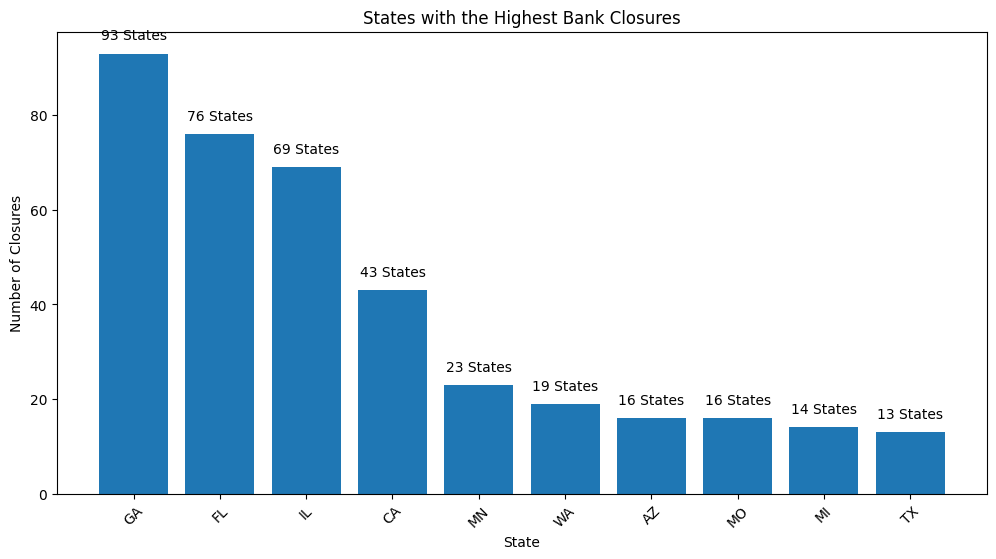

In [26]:
import matplotlib.pyplot as plt

# Task: States with the highest bank closures
states_closures = df.groupby('State').size().reset_index(name='ClosureCount')
top_states_closures = states_closures.sort_values(by='ClosureCount', ascending=False).head(10)

# Create a bar chart to visualize states with the most closures
plt.figure(figsize=(12, 6))
plt.bar(top_states_closures['State'], top_states_closures['ClosureCount'])
plt.title('States with the Highest Bank Closures')
plt.xlabel('State')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)

# Add annotations for the number of states that were closed
for index, row in top_states_closures.iterrows():
    plt.annotate(f"{row['ClosureCount']} States", (row['State'], row['ClosureCount']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


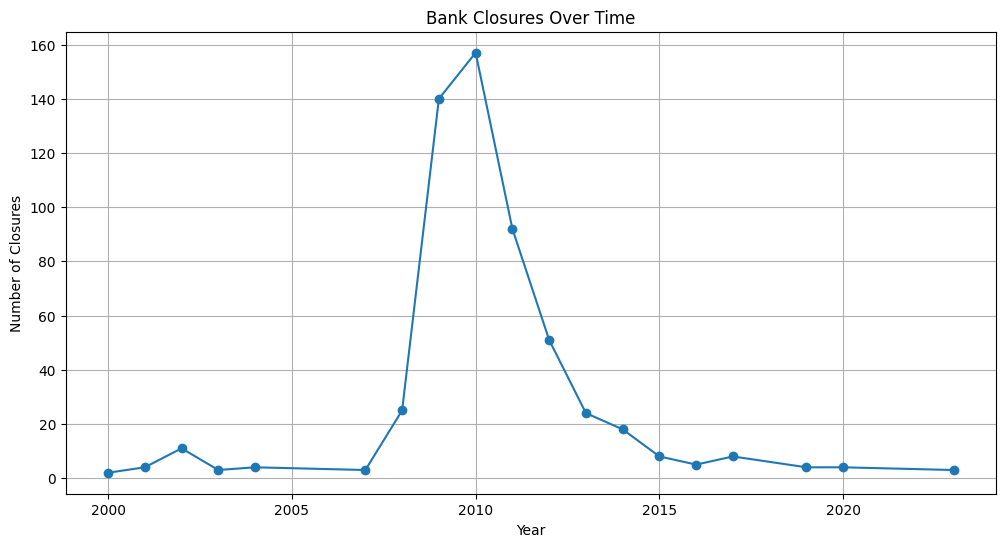

In [46]:
# Convert 'Closing Date' to datetime with error handling
df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')

# Group the data by year and count closures for each year
closure_counts = df.groupby(df['Closing Date'].dt.year)['Bank Name'].count()

# Create a time series chart (line chart) for bank closures over time
plt.figure(figsize=(12, 6))
plt.plot(closure_counts.index, closure_counts.values, marker='o', linestyle='-')
plt.title('Bank Closures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Closures')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

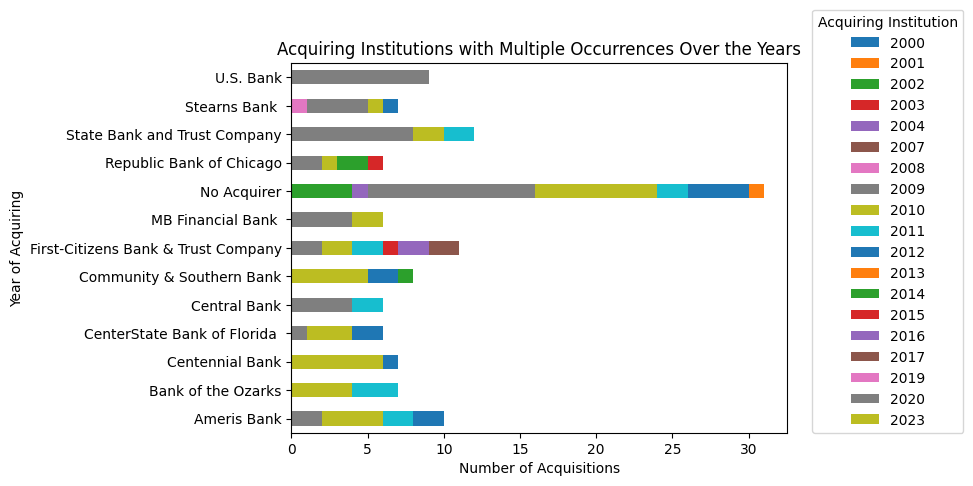

In [45]:
import pandas as pd

# Replace spaces with hyphens in the 'Closing Date' column
df_filtered['Closing Date'] = df_filtered['Closing Date'].str.replace(' ', '-')

# Extract the year from 'Closing Date' column
df_filtered['Year of Acquiring'] = pd.to_datetime(df_filtered['Closing Date'], format='%d-%b-%y').dt.year

# Group the data by the acquiring institution and year
acquiring_institution_years = df_filtered.groupby(['Acquiring Institution', 'Year of Acquiring']).size().unstack(fill_value=0)

# Filter institutions that appeared more than once
acquiring_institutions_more_than_once = acquiring_institution_years[acquiring_institution_years.sum(axis=1) > 5]

# Create a horizontal bar chart to visualize institutions with multiple occurrences over the years
plt.figure(figsize=(12, 8))
acquiring_institutions_more_than_once.plot(kind='barh', stacked=True)
plt.title('Acquiring Institutions with Multiple Occurrences Over the Years')
plt.xlabel('Number of Acquisitions')
plt.ylabel('Year of Acquiring')
plt.legend(title='Acquiring Institution', loc=[1.05, 0])

plt.show()